# Homework 4: Data Visualization
- **Name**:  DOPPALAPUDI MADHUKAR
- **UB Username**: mdoppala
- **UB Person Number**:  5054 4966

##
 Problem 1 - Scatter Plot with a *Line*

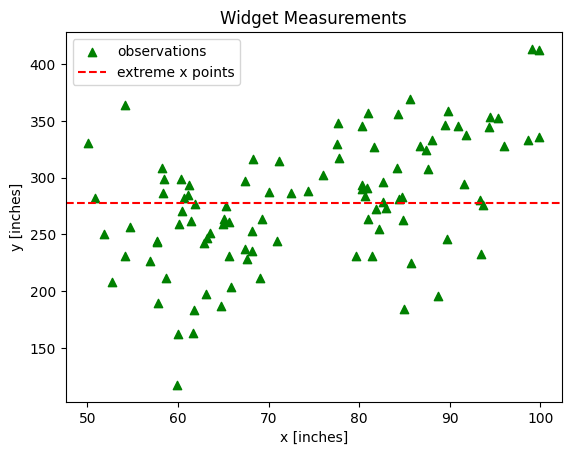

In [13]:
import matplotlib.pyplot as plt
import pandas as pd

# Load the data from a CSV file and store it in a DataFrame
data = pd.read_csv('scatter_data.csv')

# Clean up the column names to remove any extra spaces
data.columns = data.columns.str.strip()

# Rename specific columns for clarity, changing '% x' to 'x' and ' y ' to 'y'
data = data.rename(columns={'% x': 'x', ' y ': 'y'})

# Create a scatter plot with green triangle markers for our data points
plt.scatter(data['x'], data['y'], marker='^', color='green', label='observations')

# Add a red dashed horizontal line at the mean of the 'y' values to visualize the average
plt.axhline(y=data['y'].mean(), linestyle='--', color='red', label='extreme x points')

# Set the title and labels for our plot
plt.title('Widget Measurements')
plt.xlabel('x [inches]')
plt.ylabel('y [inches]')

# Display a legend to distinguish between data points and the red dashed line
plt.legend()

# Show our plot to visualize the data
plt.show()


## Problem 2 - Histogram

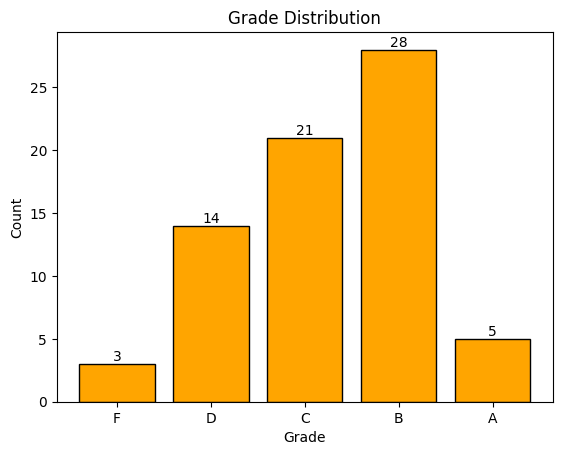

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load data from a CSV file
grades_data = pd.read_csv('student_grades.csv', comment="%", header=None)
grades_data.columns = ["studentID", "averageScore"]

# Define a function for mapping scores to grades
def map_scores_to_grades(x):
    if x < 60:
        return 'F'
    elif 60 <= x < 70:
        return 'D'
    elif 70 <= x < 80:
        return 'C'
    elif 80 <= x < 90:
        return 'B'
    elif 90 <= x <= 100:
        return 'A'

# Apply the grade mapping function to create a new column
grades_data['grade'] = grades_data['averageScore'].apply(lambda x: map_scores_to_grades(x))

# Count and sort the grade distribution
grade_counts = grades_data['grade'].value_counts(sort=False).sort_index()

# Reorder the grades
grade_counts = grade_counts.reindex(['F', 'D', 'C', 'B', 'A'])

# Create a bar plot of the grade distribution
plt.bar(grade_counts.index, grade_counts.values, color='orange', edgecolor='black')

# Add labels to the bars
for i, v in enumerate(grade_counts.values):
    plt.text(i, v, str(v), ha='center', va='bottom')

plt.title('Grade Distribution')
plt.ylabel('Count')
plt.xlabel('Grade')

# Show the plot
plt.show()


## Problem 3 - Barplot and Boxplot in the Same Figure

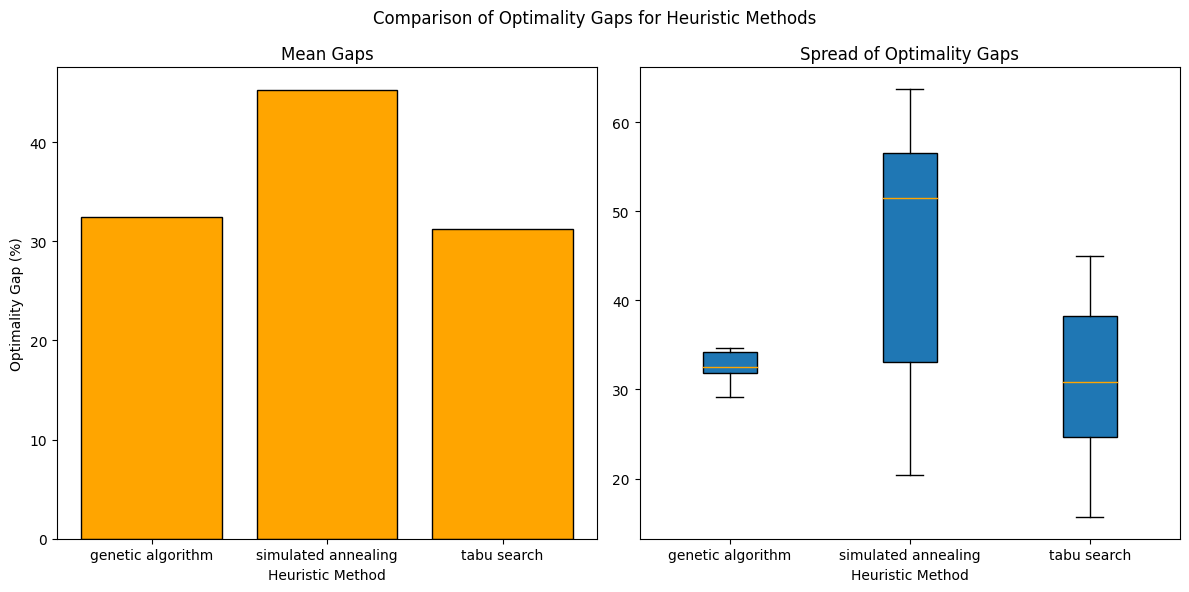

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data from a CSV file, excluding lines starting with "%", and without header
data = pd.read_csv("solution_data.csv", comment="%", header=None)

# Assign column names for clarity
data.columns = ["Problem", "Solution Method", "Value"]

# Calculate the mean of optimal solution values for each problem
optimal_values = data[data['Solution Method'] == 'optimal'].groupby('Problem')['Value'].mean()

# Calculate the mean solution values for heuristic methods for each problem and method
heuristic_values = data[data['Solution Method'] != 'optimal'].groupby(['Problem', 'Solution Method'])['Value'].mean()

# Calculate the optimality gaps as a percentage
optimality_gaps = (optimal_values - heuristic_values) / optimal_values * 100

# Reset the index for further use
optimality_gaps = optimality_gaps.reset_index()

# Create a DataFrame for bar plotting
barplot_data = pd.DataFrame({
    'Heuristic Method': optimality_gaps['Solution Method'],
    'Optimality Gap (%)': optimality_gaps['Value']
})

# Further reset the index
optimality_gaps = optimality_gaps.reset_index()

# Calculate the average gaps for specific heuristic methods
average_gaps = barplot_data[barplot_data['Heuristic Method'].isin(['genetic algorithm', 'simulated annealing', 'tabu search'])]
average_gaps = average_gaps.groupby('Heuristic Method')['Optimality Gap (%)'].mean().reset_index()

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Set the overall title for the figure
fig.suptitle("Comparison of Optimality Gaps for Heuristic Methods")

# Plot a bar chart for mean gaps
axes[0].bar(average_gaps['Heuristic Method'], average_gaps['Optimality Gap (%)'], color="orange", edgecolor="black")
axes[0].set_xlabel("Heuristic Method")
axes[0].set_ylabel("Optimality Gap (%)")
axes[0].set_title("Mean Gaps")

# Create a list of data for box plotting
data_boxplot = [optimality_gaps[optimality_gaps['Solution Method'] == method]['Value'] for method in optimality_gaps['Solution Method'].unique()]

# Plot a boxplot for the spread of optimality gaps
bp = axes[1].boxplot(data_boxplot, labels=optimality_gaps['Solution Method'].unique(), patch_artist=True, medianprops={'color': 'orange'})

# Customize labels and positions for x-axis ticks
custom_labels = optimality_gaps['Solution Method'].unique()
custom_positions = range(1, len(custom_labels) + 1)
axes[1].set_xticks(custom_positions)
axes[1].set_xticklabels(custom_labels, ha="center")
axes[1].set_xlabel("Heuristic Method")
axes[1].set_title("Spread of Optimality Gaps")

# Ensure tight layout for the subplots
plt.tight_layout()

# Display the entire figure
plt.show()


#Part 2

Link to plot type - https://matplotlib.org/stable/gallery/pie_and_polar_charts/pie_features.html#sphx-glr-gallery-pie-and-polar-charts-pie-features-py

Link to data set - https://www.kaggle.com/datasets/rajatkumar30/streaming-application-viewership

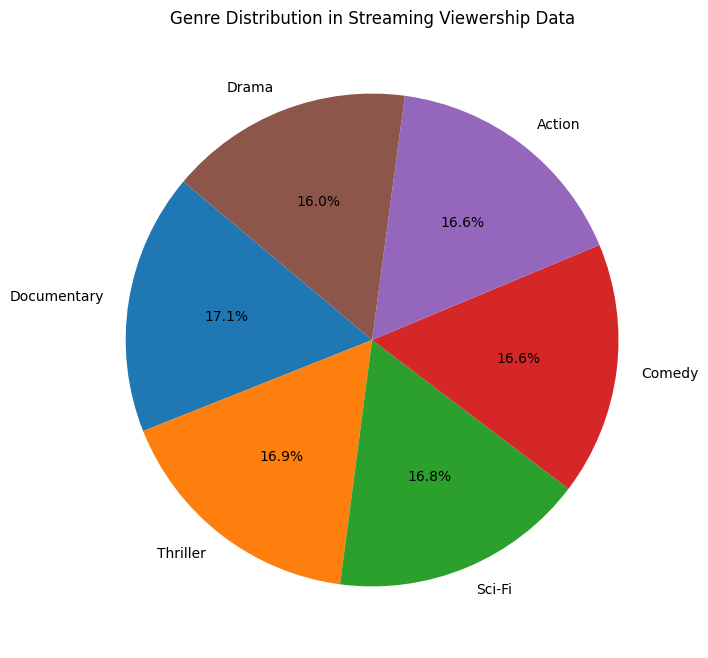

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the streaming viewership data from the CSV file
data = pd.read_csv('streaming_viewership_data.csv')

# Extract the "Genre" column
genres = data['Genre']

# Count the frequency of each genre
genre_counts = genres.value_counts()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(genre_counts, labels=genre_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Genre Distribution in Streaming Viewership Data')

# Display the pie chart
plt.show()


The pie chart provides a visual representation of the genre distribution in the streaming viewership data. Each slice of the pie represents a different genre, and the size of each slice corresponds to the proportion of that genre in the dataset. The labels on each slice indicate the genre name, and the percentage inside each slice indicates the relative frequency of that genre compared to the total data. In this way, the pie chart allows you to quickly understand the distribution of genres within the streaming viewership data, making it easy to see which genres are more or less popular among viewers.